In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
 
 
X=[[11,5669],[11,5895],[11,7008],[11,6408],[12,6775],[12,6996],[14,6858],[14,6857],[14,8035],[14,8124]]
Y=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

correlation_df = pd.DataFrame(X,columns=['shelters','homeless'])
correlation_df['year']=pd.Series(Y)
correlation_df

,shelters,homeless,year
0,11,5669,2011
1,11,5895,2012
2,11,7008,2013
3,11,6408,2014
4,12,6775,2015
5,12,6996,2016
6,14,6858,2017
7,14,6857,2018
8,14,8035,2019
9,14,8124,2020


In [2]:
#Multiple linear regression model
model = smf.ols(formula='year ~ shelters + homeless', data=correlation_df)
results_formula=model.fit()
results_formula.params

Intercept    1987.891900
shelters        1.267041
homeless        0.001734
dtype: float64

In [3]:
x_surf, y_surf = np.meshgrid(np.linspace(correlation_df.shelters.min(), correlation_df.shelters.max(), 15), np.linspace(correlation_df.homeless.min(), correlation_df.homeless.max(),10000))
x_df = pd.DataFrame({'shelters':x_surf.ravel(),'homeless':y_surf.ravel()})
y_axis = results_formula.predict(exog=x_df)

y_axis=np.array(y_axis)

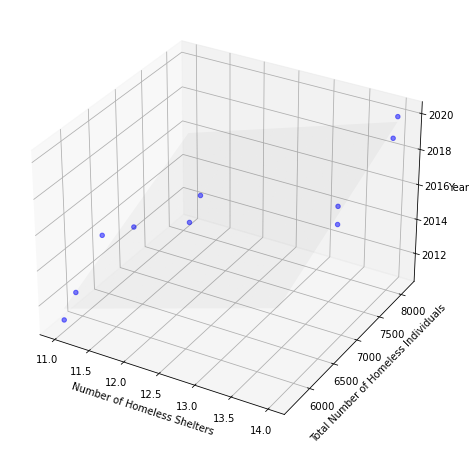

In [4]:
#Creating the scatterplot

fig = plt.figure(figsize = (11, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(correlation_df['shelters'],correlation_df['homeless'],correlation_df['year'],c='blue', marker='o',alpha=0.5)
ax.plot_surface(x_surf,y_surf,y_axis.reshape(x_surf.shape),color='None',alpha=.03)
ax.set_xlabel('Number of Homeless Shelters')
ax.set_ylabel('Total Number of Homeless Individuals')
ax.set_zlabel('Year')
plt.show()